In [1]:
from importlib import reload
try:
    core = reload(core)
except:
    import core
from core import *
# ROOT_DIR = "./data/GERNAS/POST_GERNA/"
ROOT_DIR = {
    True:"./data/POST_REGNA_PERFECT/",
    False:"./data/POST_REGNA/"
}
plt.rcParams.update(
    {
        "font.size": 32,
        "lines.linewidth": 6,
        "lines.markersize": 24,
    }
)

In [2]:
sinr_perfect = [False,True]
qos_re_class_range = [True,False]
seed_range = [ (i + 1) for i in range(20)]
# seed_range = [ (i + 1) for i in range(20) if i not in [2,9,8,15]]
res_alloc_type_range = [ResourceAllocatorType.NOMA_APR]
req_rsu_range = [True]
traffic_scale_range = [ 1.4 ]
dyn_sg_behav_range = [DynamicSocialGroupBehaviour.MAX_N_MEMBER]
dyn_sg_conf_range = [(i*2)+5 for i in range(5)]

In [3]:
os.getcwd()

'/home/OD/repos/ProjectSumo'

In [4]:
interest_config = InterestConfig(
    None,
    None,
    False,
    ResourceAllocatorType.NOMA_OPT,
    False,
    0,
    0
)
stats = {
    sinr_stat:{
        dyn_sg_behav: {
            dyn_sg_conf: {
                qos_re_class:
                {
                    seed: {
                        res_alloc_type: {
                            req_rsu: {
                                traffic_scale: None
                                for traffic_scale in traffic_scale_range
                            }
                            for req_rsu in req_rsu_range
                        }
                        for res_alloc_type in res_alloc_type_range
                    }
                    for seed in seed_range
                }
                for qos_re_class in qos_re_class_range
            }
            for dyn_sg_conf in dyn_sg_conf_range
        }
        for dyn_sg_behav in dyn_sg_behav_range
    }
    for sinr_stat in sinr_perfect

}
for sinr_stat in sinr_perfect:
    for dyn_sg_behav in dyn_sg_behav_range:
        for dyn_sg_conf in dyn_sg_conf_range:
            for qos_re_class in qos_re_class_range:
                for seed in seed_range:
                    for res_alloc_type in res_alloc_type_range:
                        for req_rsu in req_rsu_range:
                            for traffic_scale in traffic_scale_range:
                                interest_config.dyn_sg_behav = dyn_sg_behav
                                interest_config.dyn_sg_conf = dyn_sg_conf
                                interest_config.qos_re_class = qos_re_class
                                interest_config.res_alloc_type = res_alloc_type
                                interest_config.req_rsu = req_rsu
                                interest_config.traffic_scale = traffic_scale
                                interest_config.rng_seed = seed
                                try:
                                    print(ROOT_DIR[sinr_stat] + interest_config.folder())
                                    with open(ROOT_DIR[sinr_stat] + interest_config.folder() + "report.pickle", "rb") as file:
                                        # with open("data/yQoS/{}/{}/report_adjust_wait_time_nQoS.pickle".format(seed,str(interest_config)), "rb") as file:
                                        stats[sinr_stat][dyn_sg_behav][dyn_sg_conf][qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale] = pickle.load(
                                            file)
                                except Exception as e:
                                    print("missing: {}. => {}".format(str(interest_config),e))


./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S1/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S2/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S3/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S4/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S5/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S6/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S7/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S8/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S9/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S10/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S11/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S12/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S13/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S14/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S15/
./data/POST_REGNA/MAX_N_MEMBER(5)/yQoS/yRSU/NOMA_APR/D1.4/S16/
.

In [5]:
graphs={}

In [6]:
configs = [
    {
        "catalog": "end-to-end",
        "topic": "End-to-End Time",
        "x": "Group Member Limit",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
    {
        "catalog": "wait-time",
        "topic": "Queue Time",
        "x": "Group Member Limit",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
    {
        "catalog": "tx-time",
        "topic": "Transfer Time",
        "x": "Group Member Limit",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
    {
        "catalog": "bs-wait-time",
        "topic": "BS Queue Time",
        "x": "Group Member Limit",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
    {
        "catalog": "bs-tx-time",
        "topic": "BS Transfer Time",
        "x": "Group Member Limit",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
]


# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    subjects = config["subject"]
    for subject in subjects:
        for sinr_stat in sinr_perfect:
            for req_rsu in req_rsu_range:
                for qos_re_class in ScenarioQoSReClassRange(req_rsu):
                    for dyn_sg_behav in dyn_sg_behav_range:
                        title = "{} {}({},{})".format(
                                ExtractAbbreviations(subject),
                                topic,
                                ScenarioPrefix(req_rsu,qos_re_class),
                                ScenarioDynamicSGName(dyn_sg_behav)
                        )
                        if(title not in graphs):
                            save_as  = "{} {}({},{})".format(
                                ExtractAbbreviations(subject),
                                topic,
                                ScenarioPrefix(req_rsu,qos_re_class),
                                dyn_sg_behav.name
                            )
                            graphs[title] = Graph(title, config["x"], config["y"],ncols=len(res_alloc_type_range),save_as=save_as)
                        graph = graphs[title]
                        for res_alloc_type in res_alloc_type_range:    
                            for nft in ScenarioNetFlowType(qos_re_class):
                                y = []
                                x = dyn_sg_conf_range
                                for dyn_sg_conf in dyn_sg_conf_range:
                                    value = []
                                    for seed in seed_range:
                                        v = stats[sinr_stat][dyn_sg_behav][dyn_sg_conf][qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][nft.name][subject]
                                        if v == PINF or v == NINF:
                                            v = 0
                                        value.append(v*1000)
                                    y.append(sum(value) / len(value))
                                graph.addLine(
                                    Line("[{}]{}:{}".format(ScenarioSINRState(sinr_stat),ScenarioAllocName(res_alloc_type), nft.name.lower()), x, y)
                                )



In [7]:
configs = [
    {
        "catalog": "to-ratio",
        "topic": "Timeout Ratio",
        "x": "Group Member Limit",
        "y": "Percent(%)",
    },
]


# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    for sinr_stat in sinr_perfect:
        for req_rsu in req_rsu_range:
            for qos_re_class in ScenarioQoSReClassRange(req_rsu):
                for dyn_sg_behav in dyn_sg_behav_range:
                    title = "{}({},{})".format(
                            topic,
                            ScenarioPrefix(req_rsu,qos_re_class),
                            ScenarioDynamicSGName(dyn_sg_behav)
                        )
                    if(title not in graphs):
                        save_as = "{}({},{})".format(
                            topic,
                            ScenarioPrefix(req_rsu,qos_re_class),
                            dyn_sg_behav.name
                        )
                        graphs[title] = Graph(title, config["x"], config["y"],ncols=len(res_alloc_type_range),save_as=save_as)
                    graph = graphs[title]
                    for res_alloc_type in res_alloc_type_range:    
                        for nft in ScenarioNetFlowType(qos_re_class):
                            y = []
                            x = dyn_sg_conf_range
                            for dyn_sg_conf in dyn_sg_conf_range:
                                value = []
                                for seed in seed_range:
                                    v = stats[sinr_stat][dyn_sg_behav][dyn_sg_conf][qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][nft.name]
                                    if v == PINF or v == NINF:
                                        v = 0
                                    value.append(v * 100)
                                y.append(sum(value) / len(value))
                            graph.addLine(
                                Line("[{}]{}:{}".format(ScenarioSINRState(sinr_stat),ScenarioAllocName(res_alloc_type), nft.name.lower()), x, y)
                            )

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
/home/OD/repos/ProjectSumo/ipynb/graph/core.py:208: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(_g, figsize=(11, 8))
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


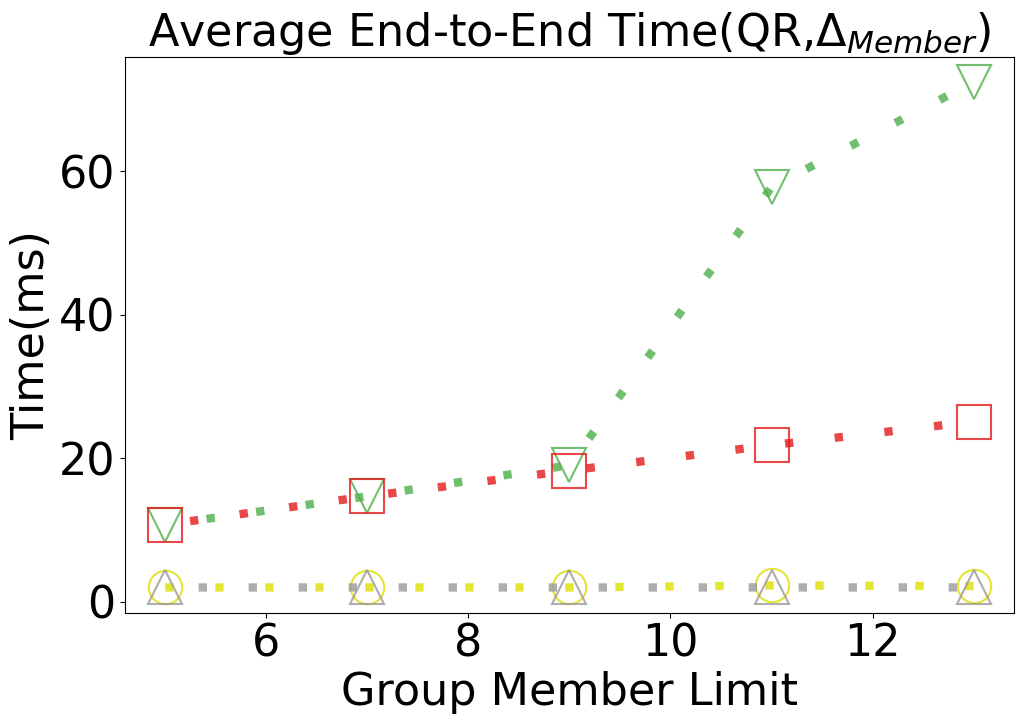

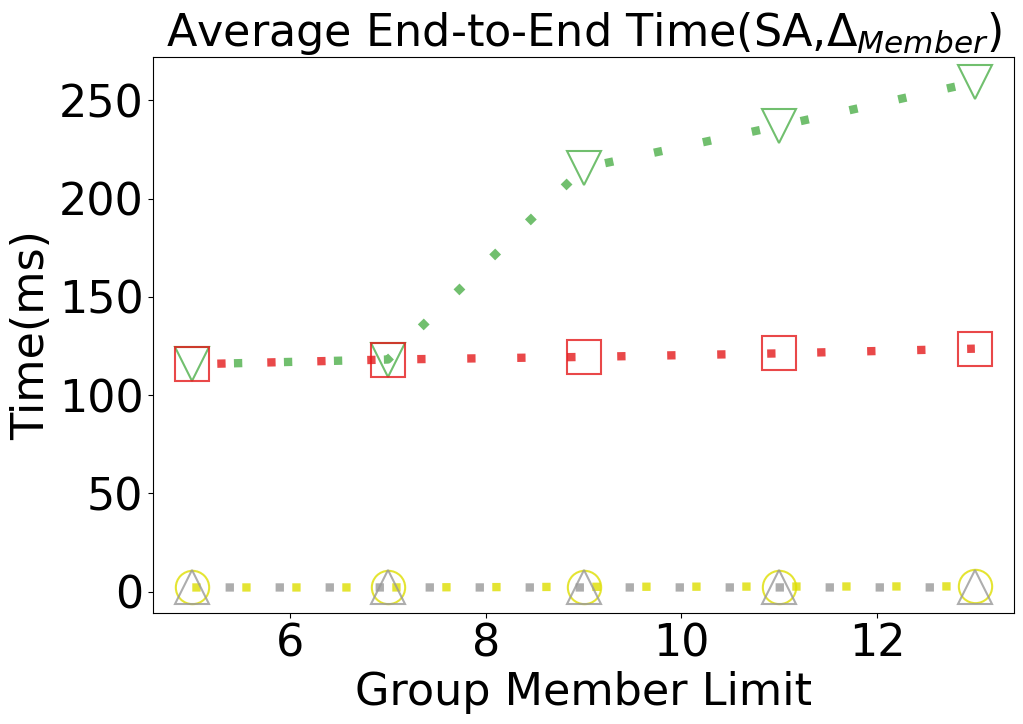

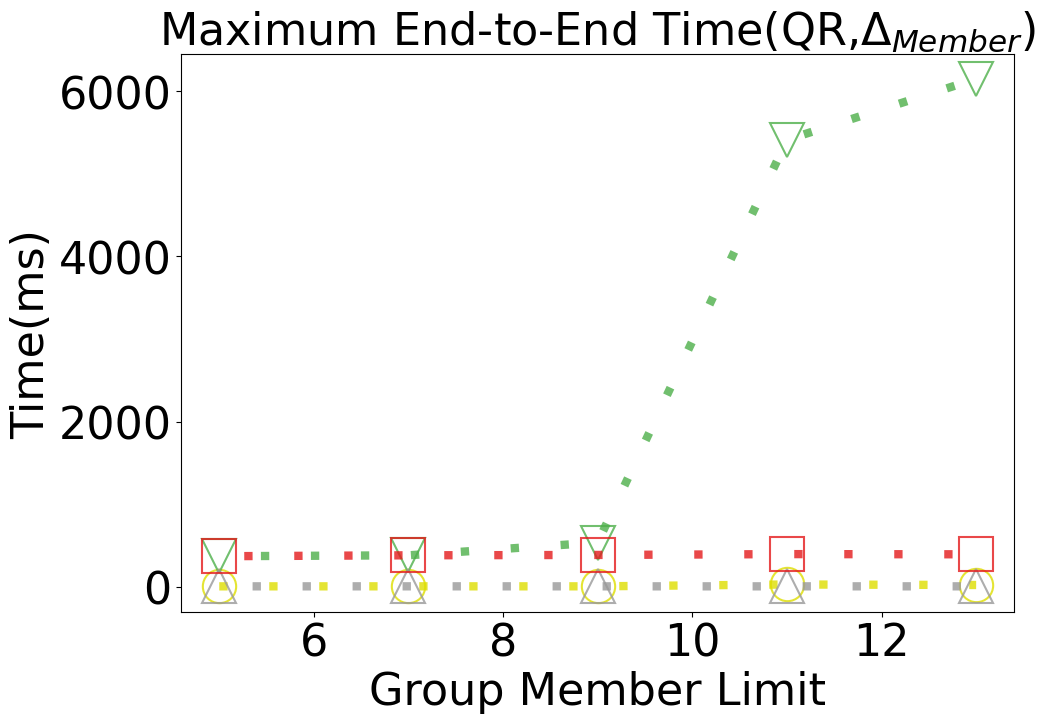

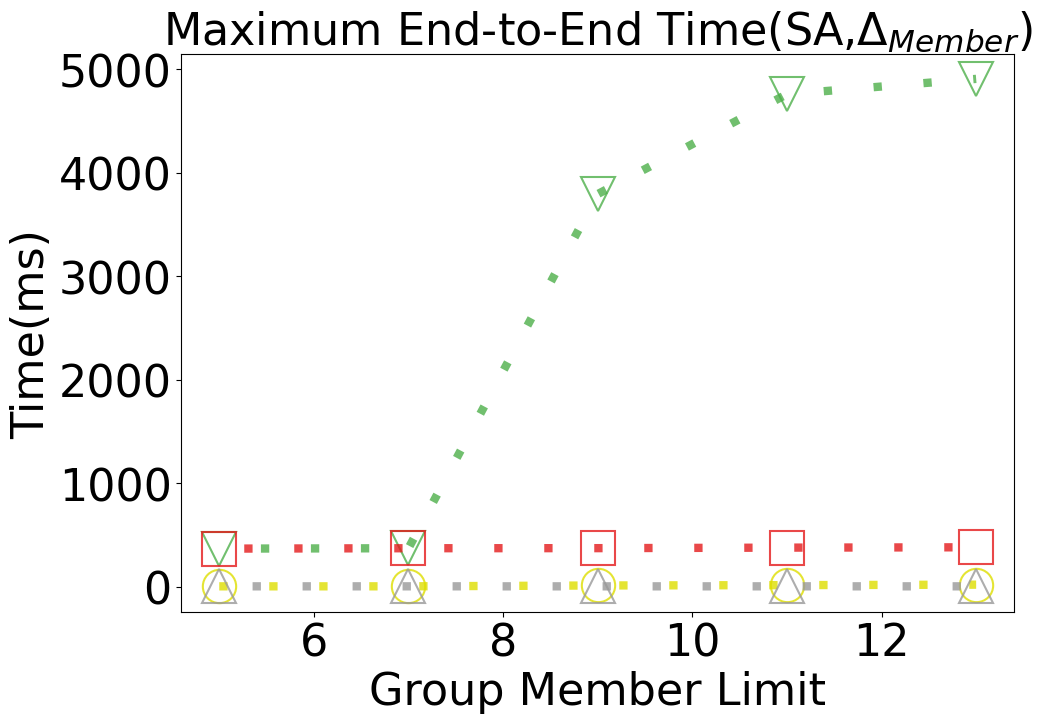

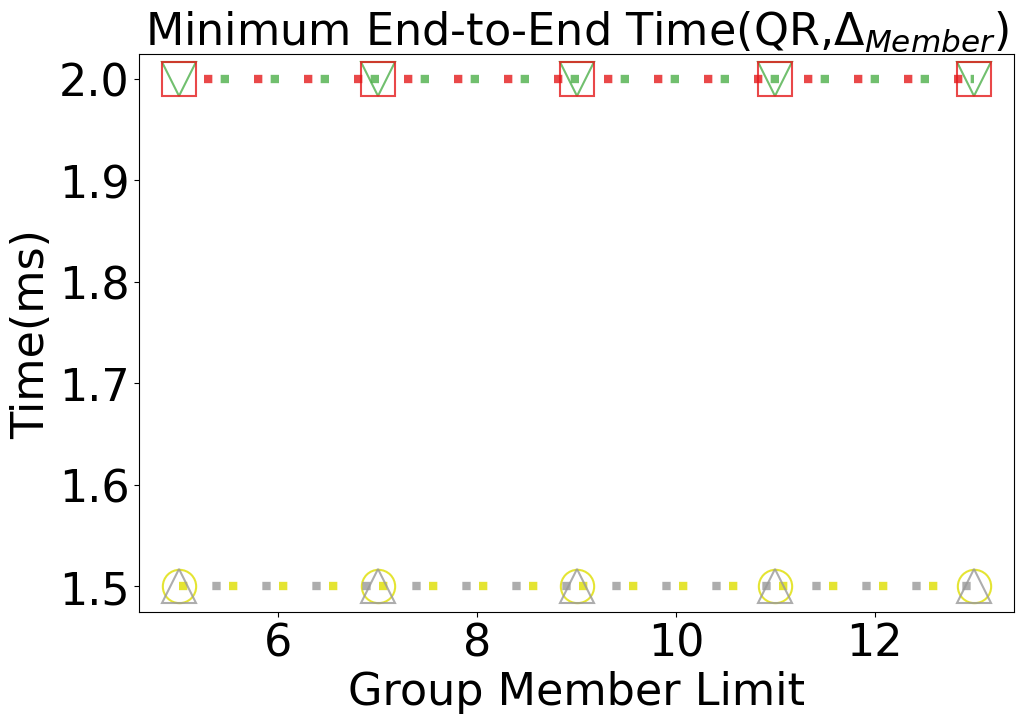

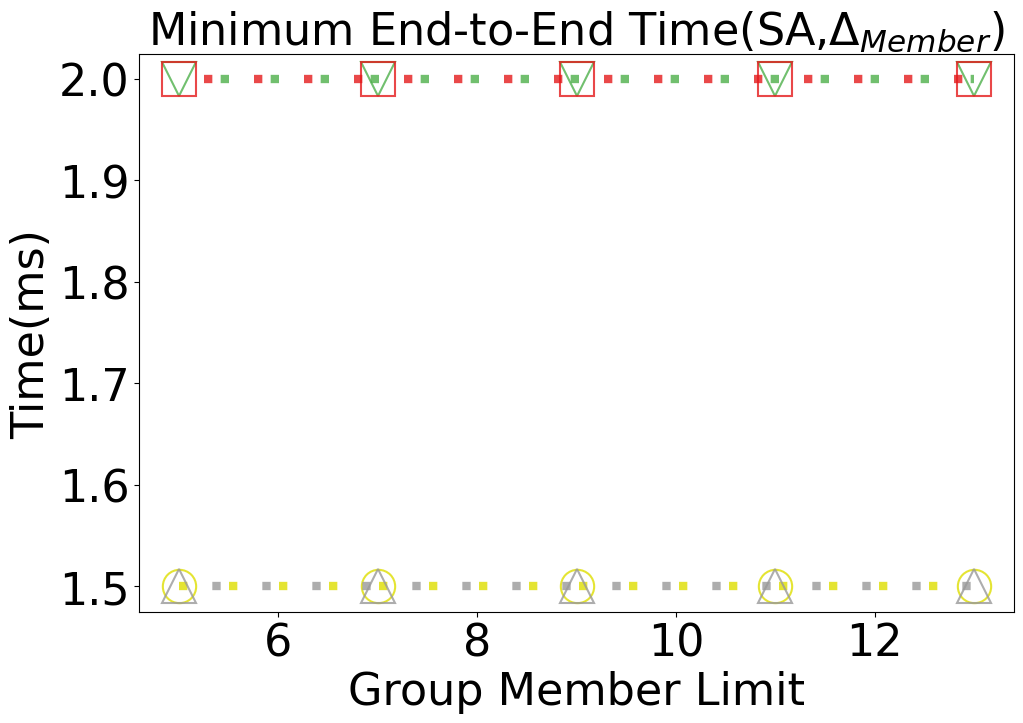

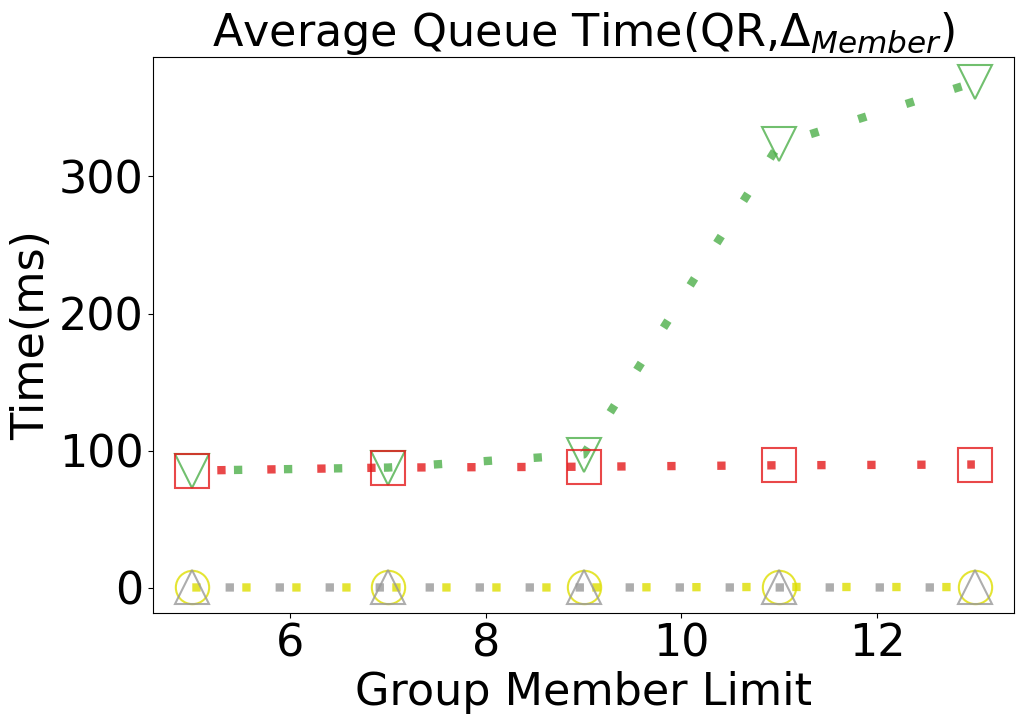

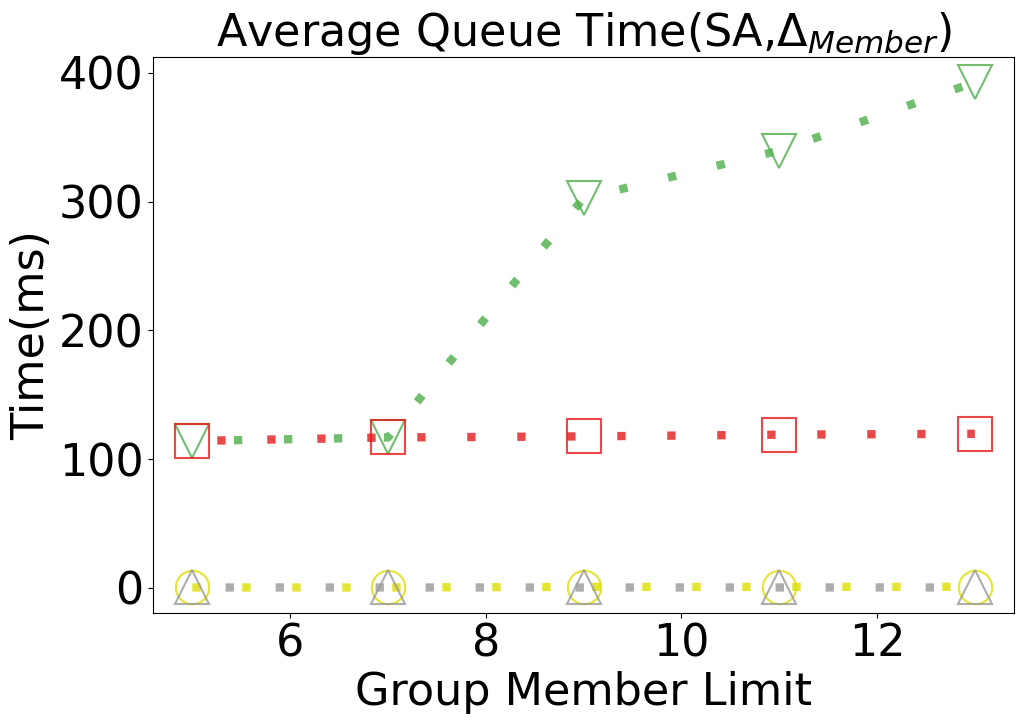

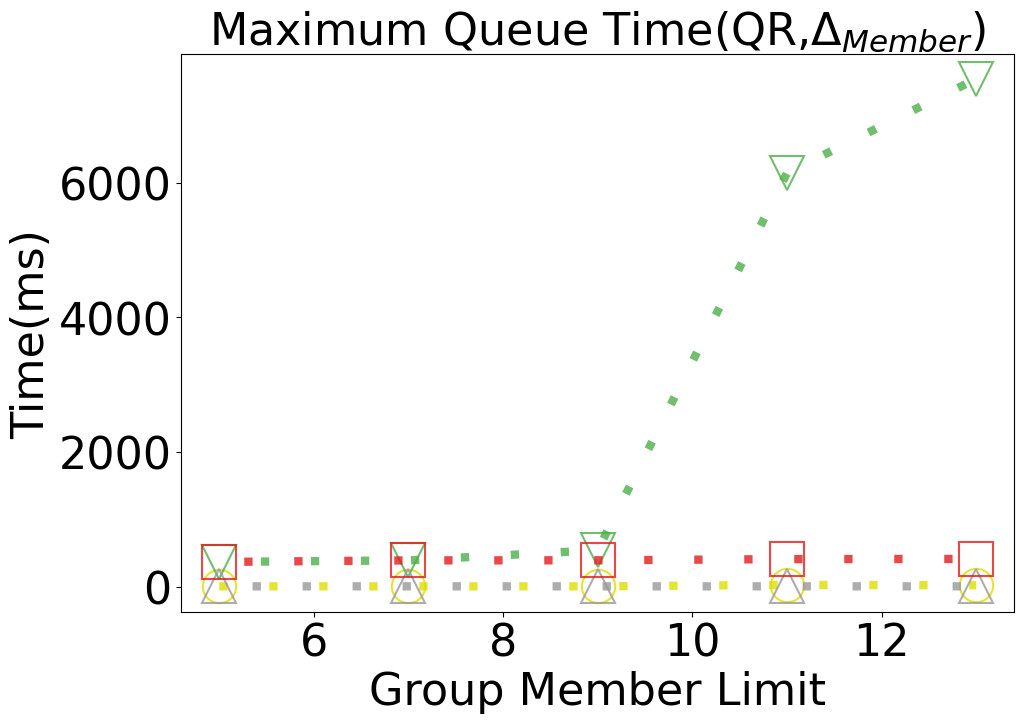

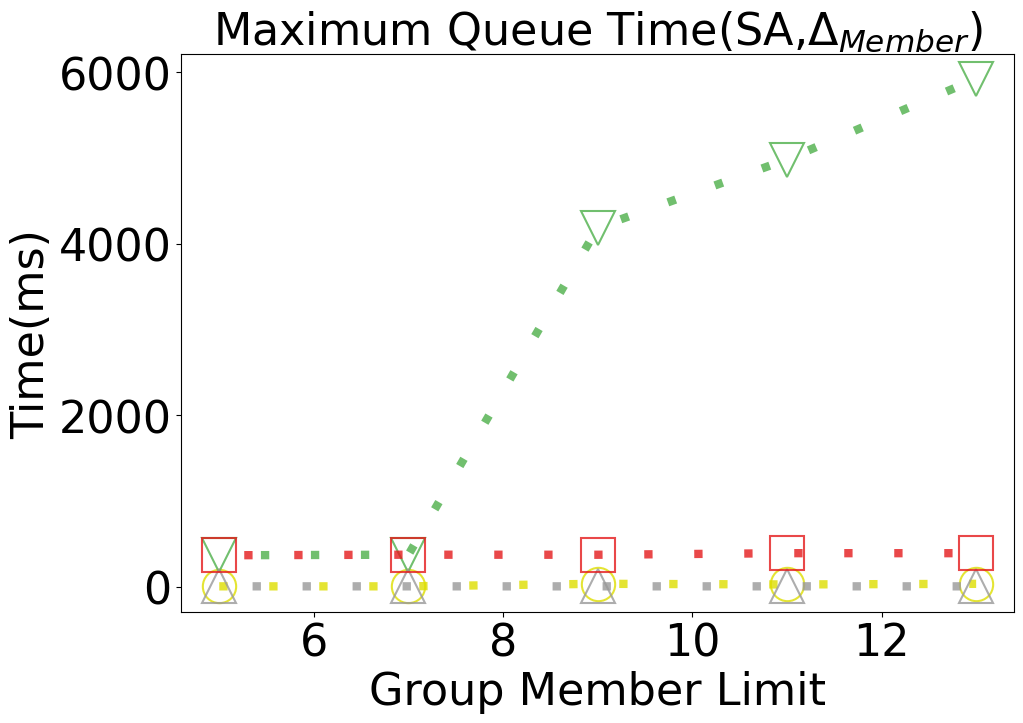

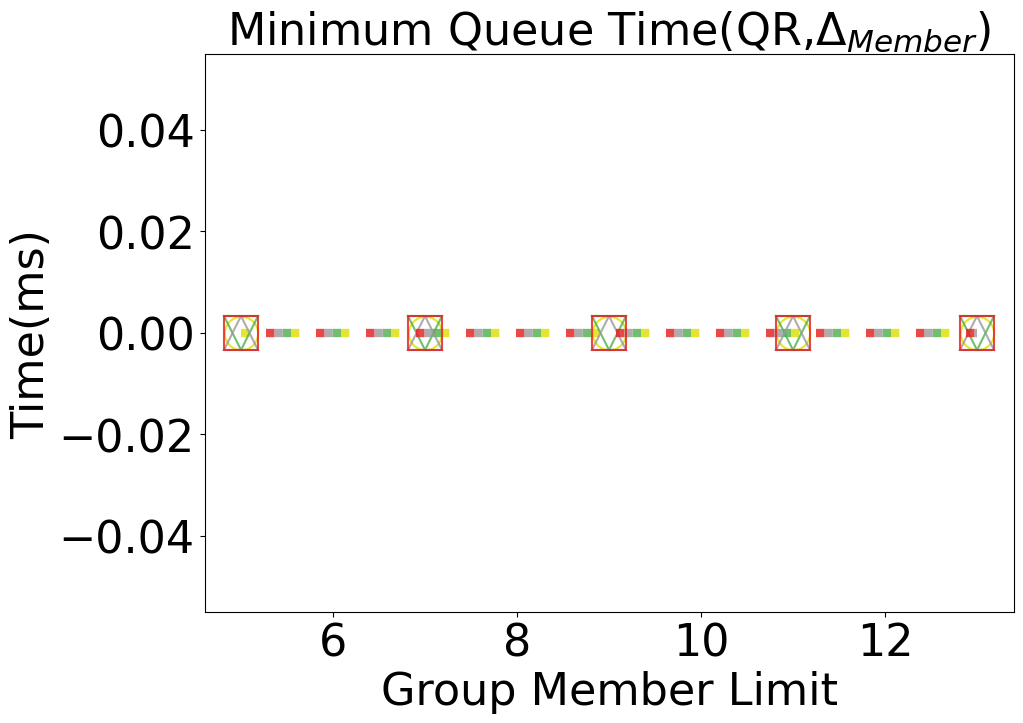

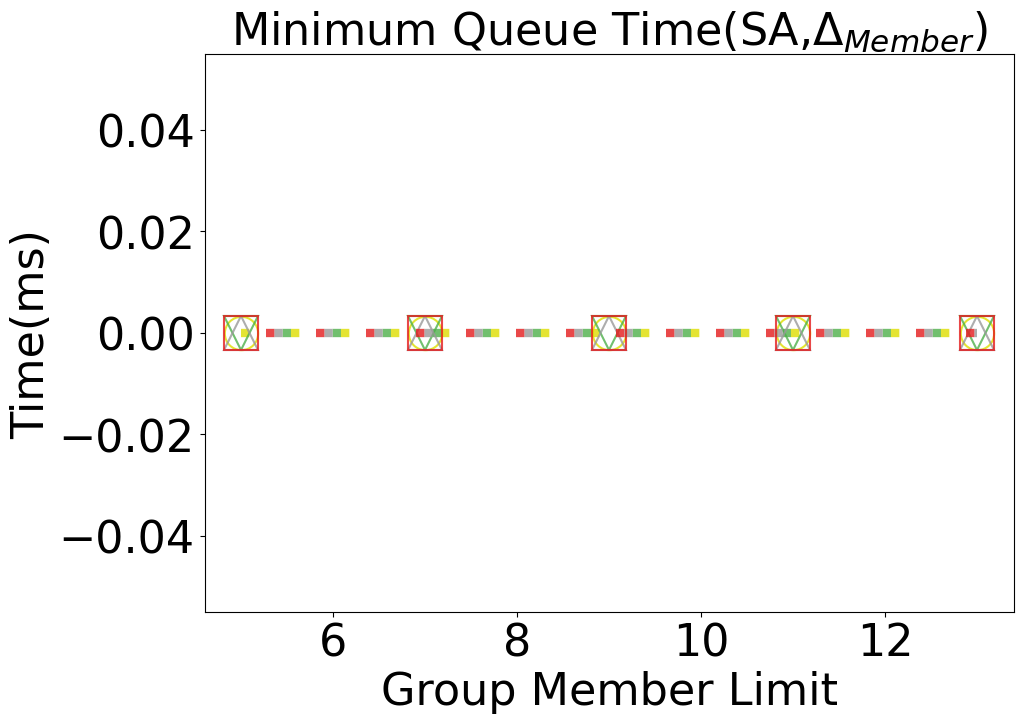

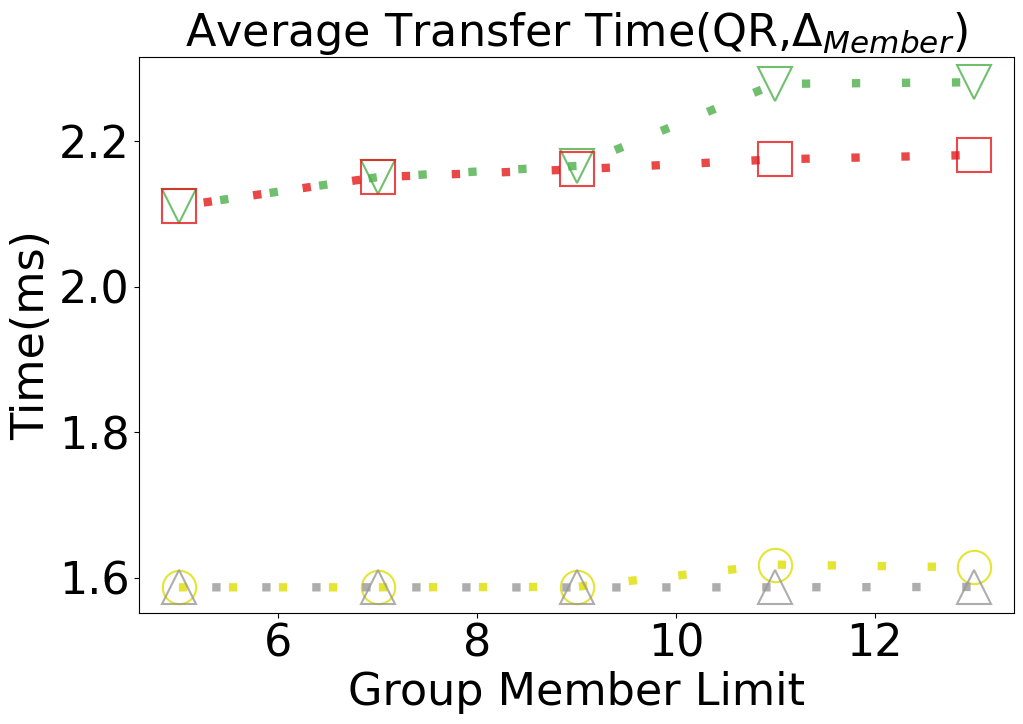

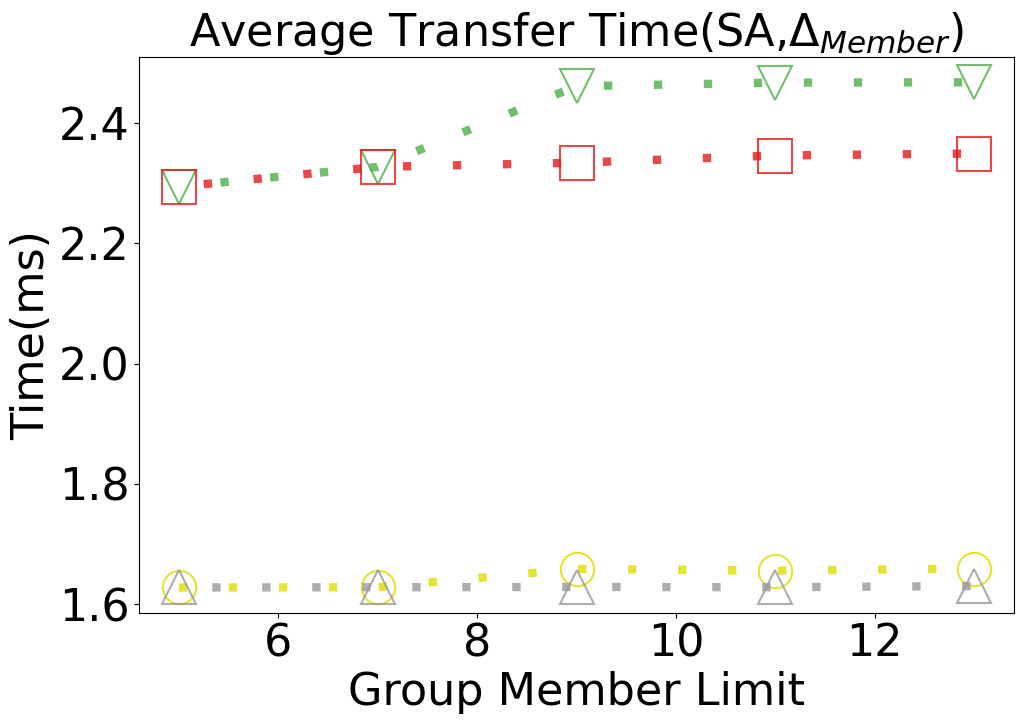

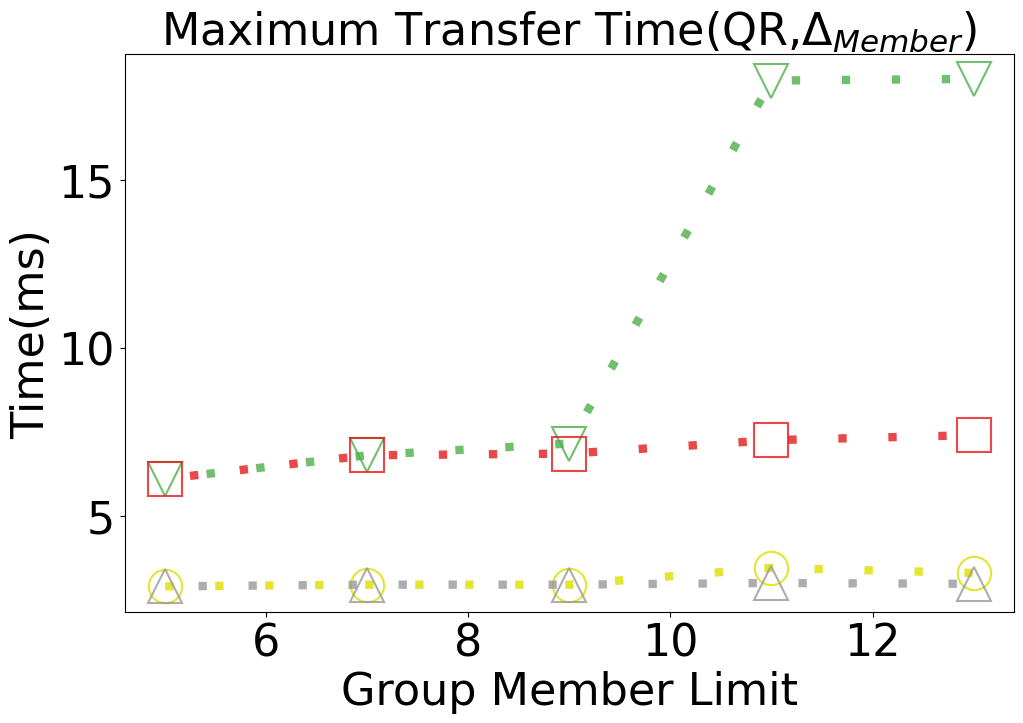

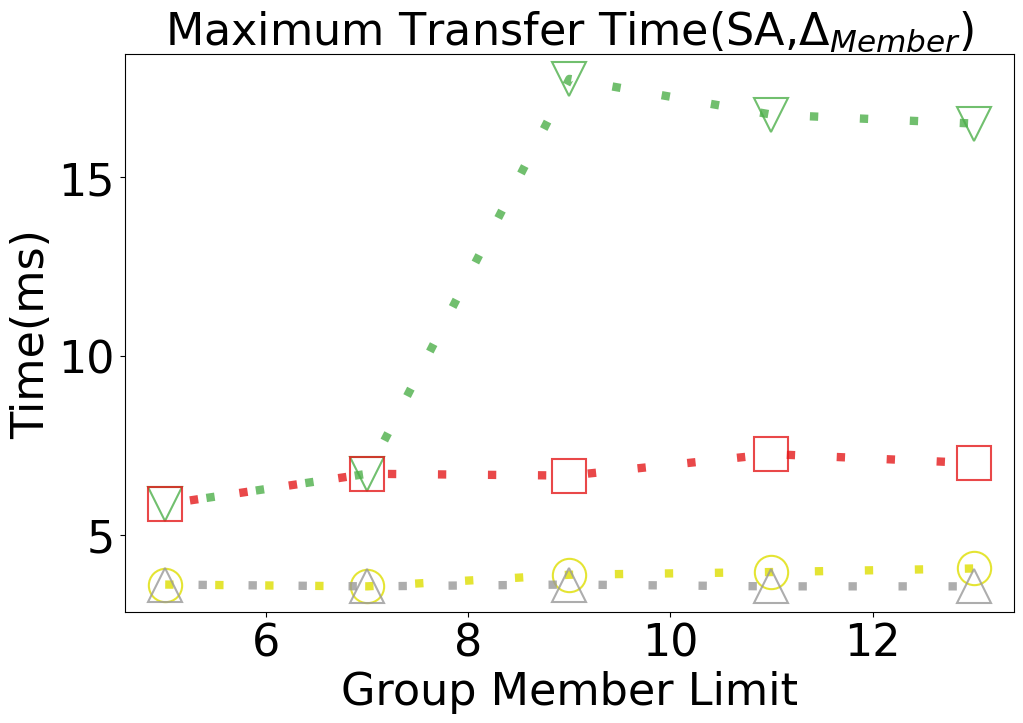

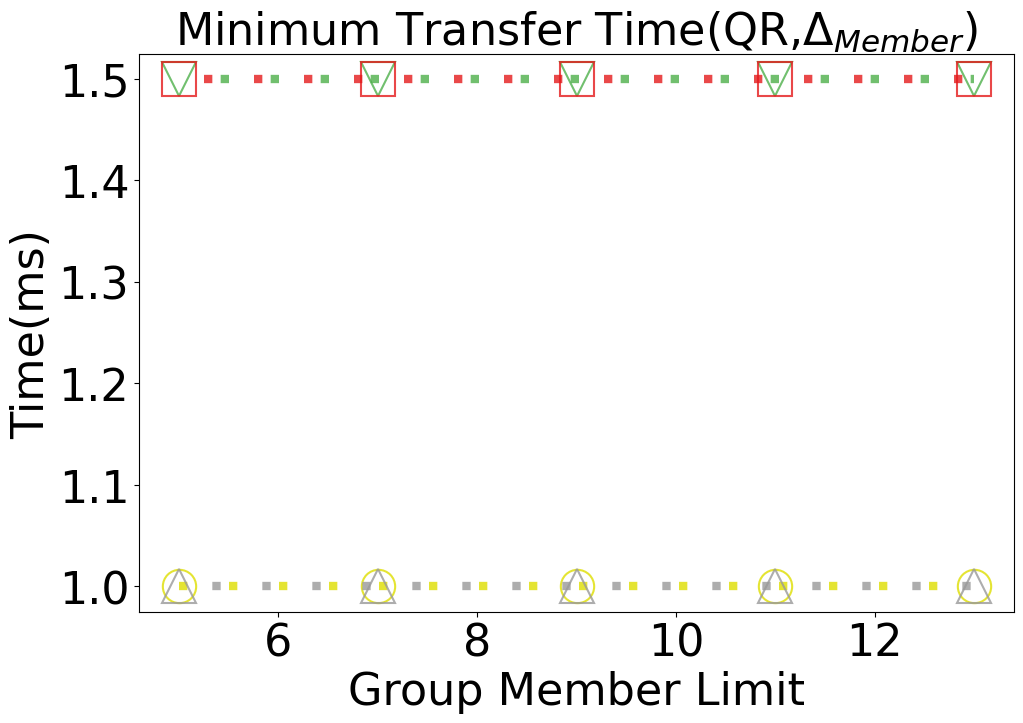

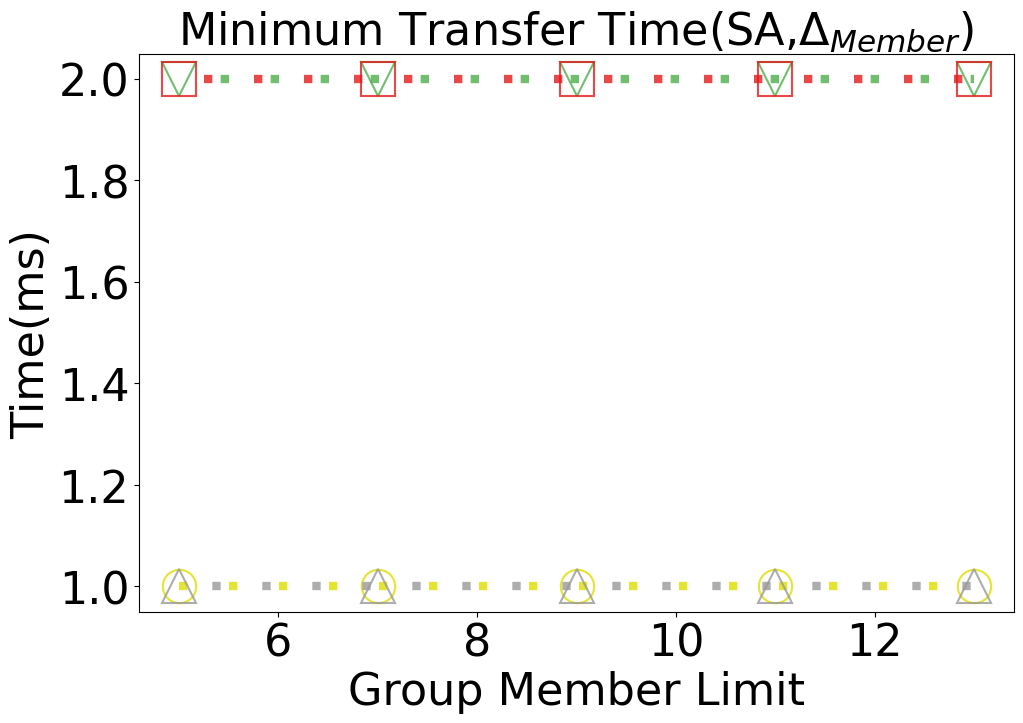

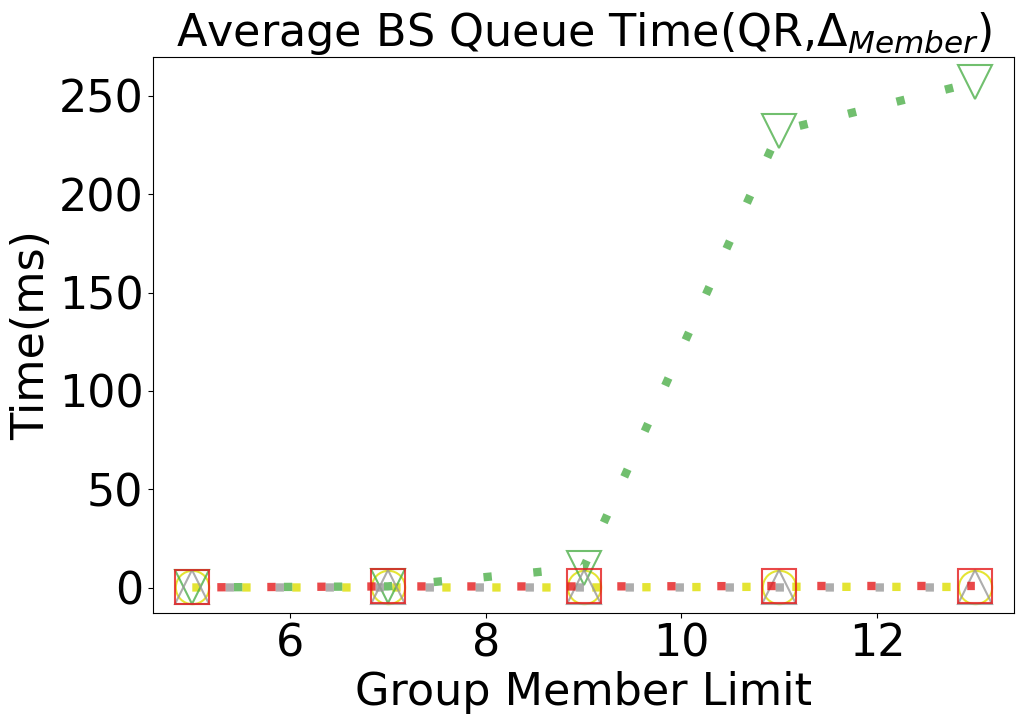

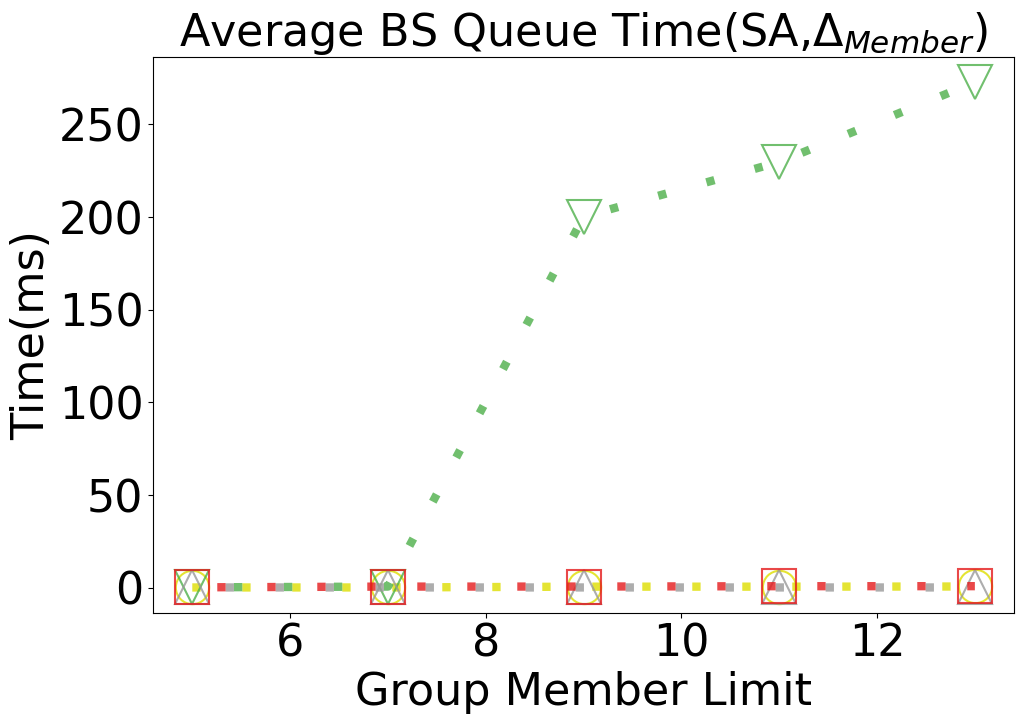

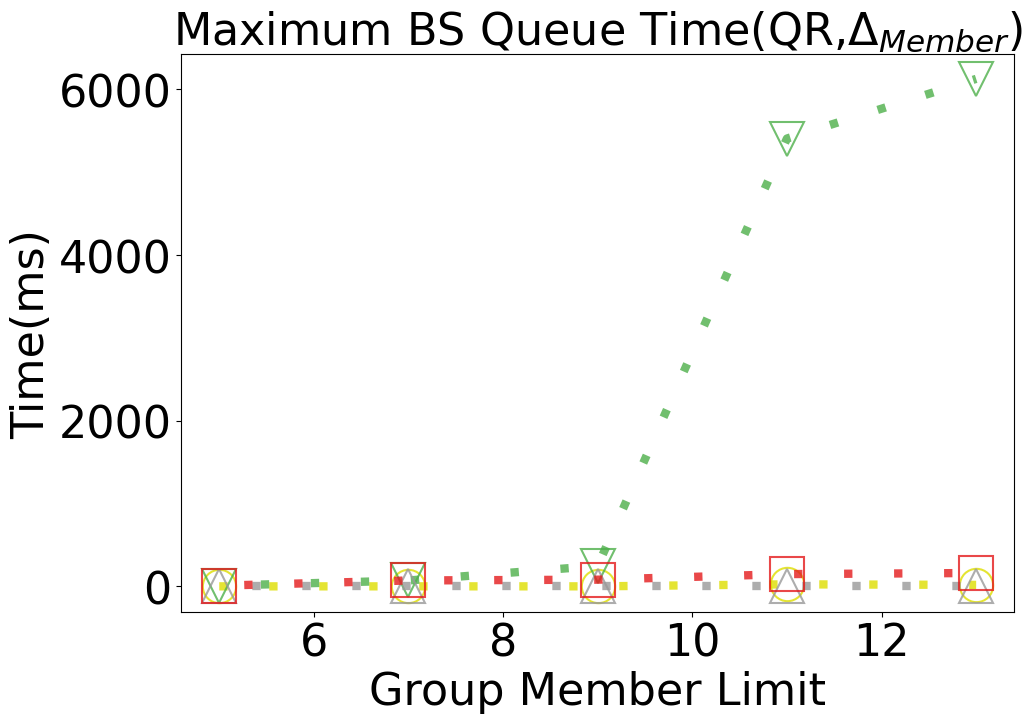

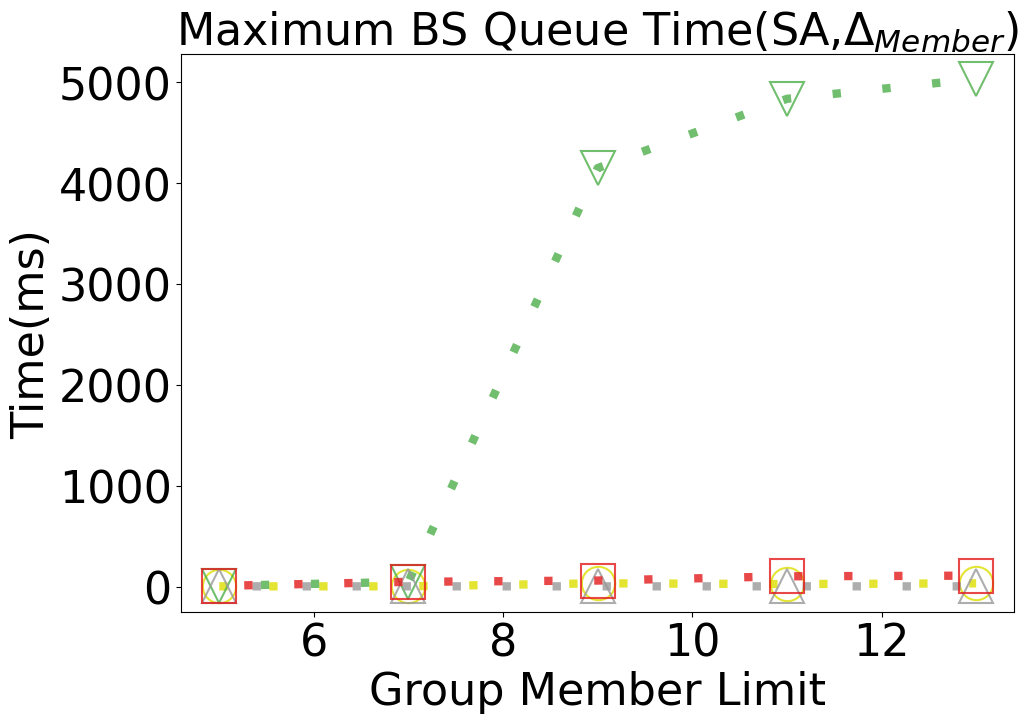

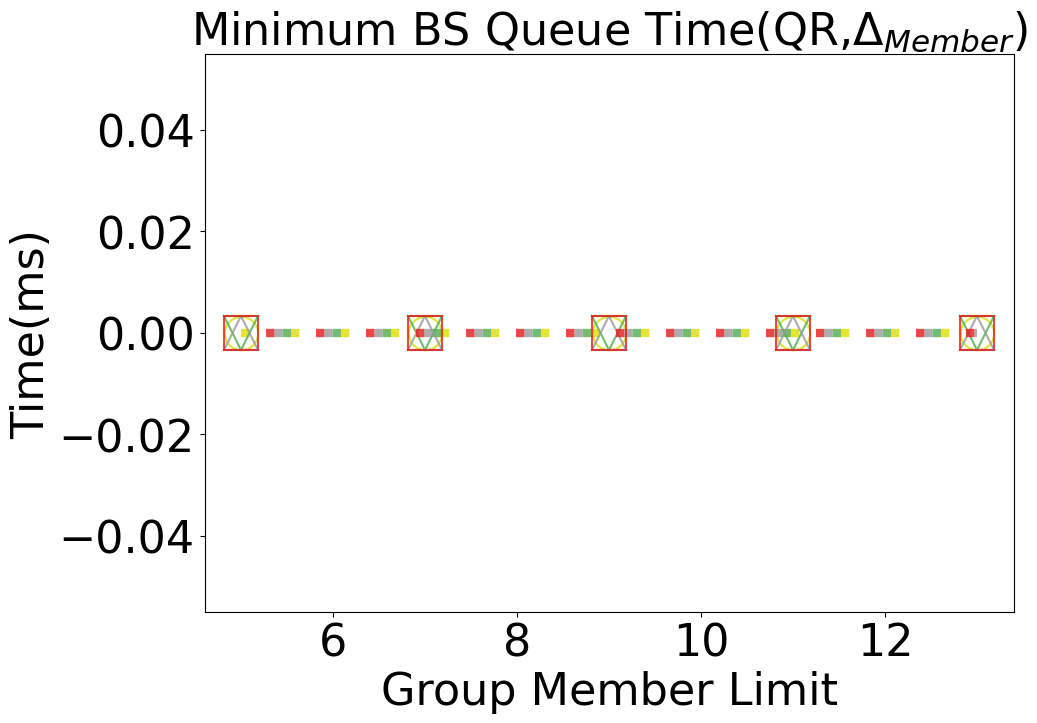

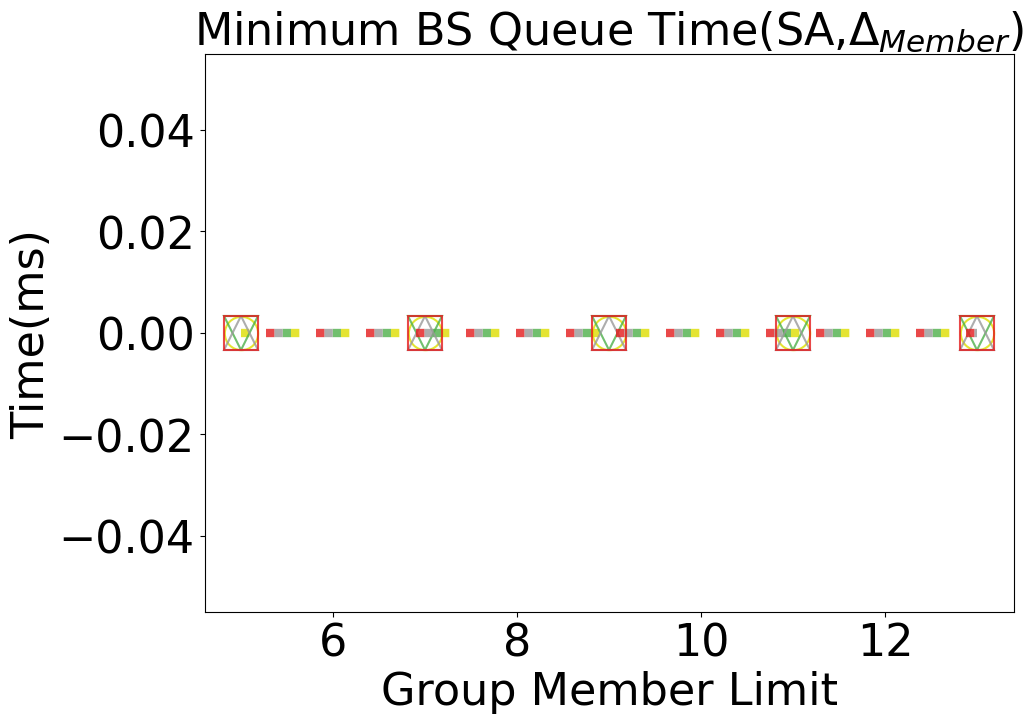

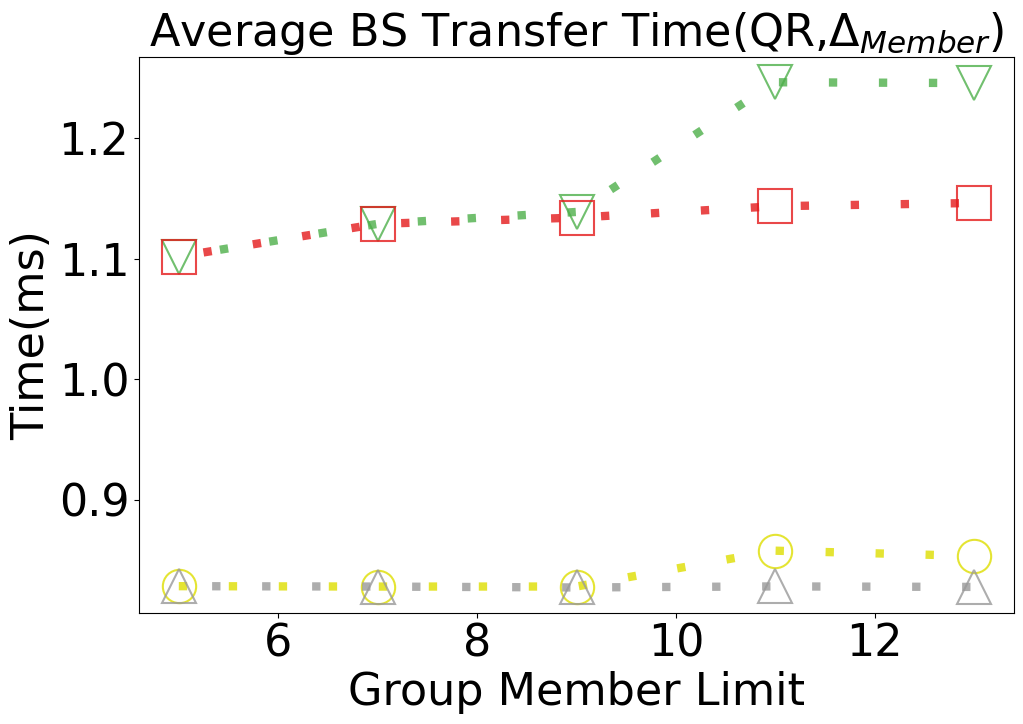

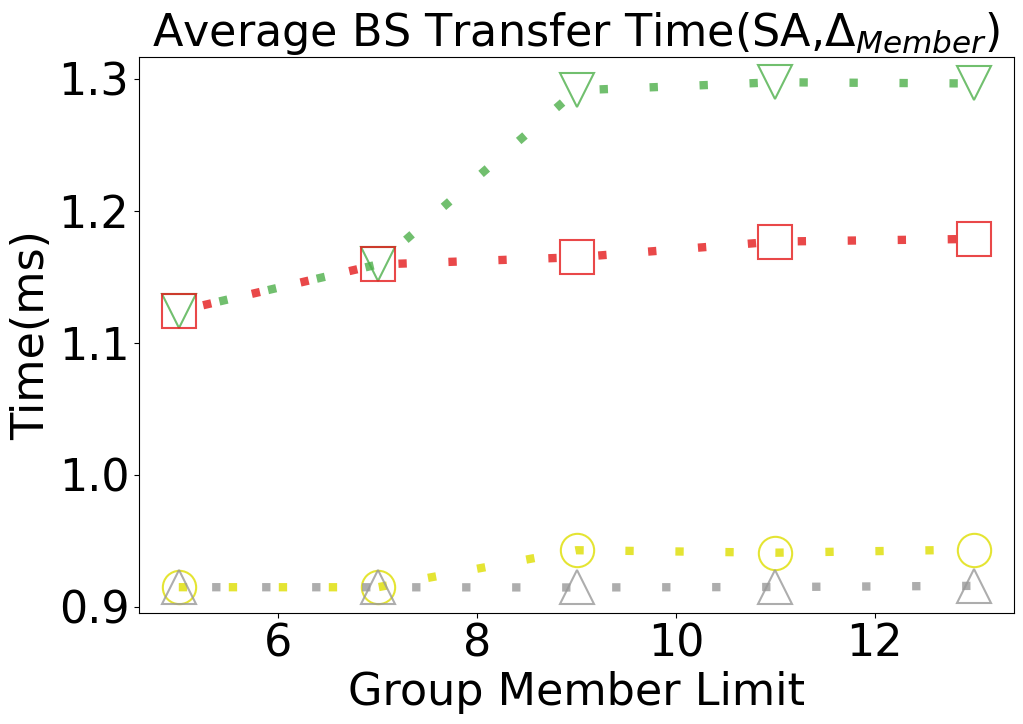

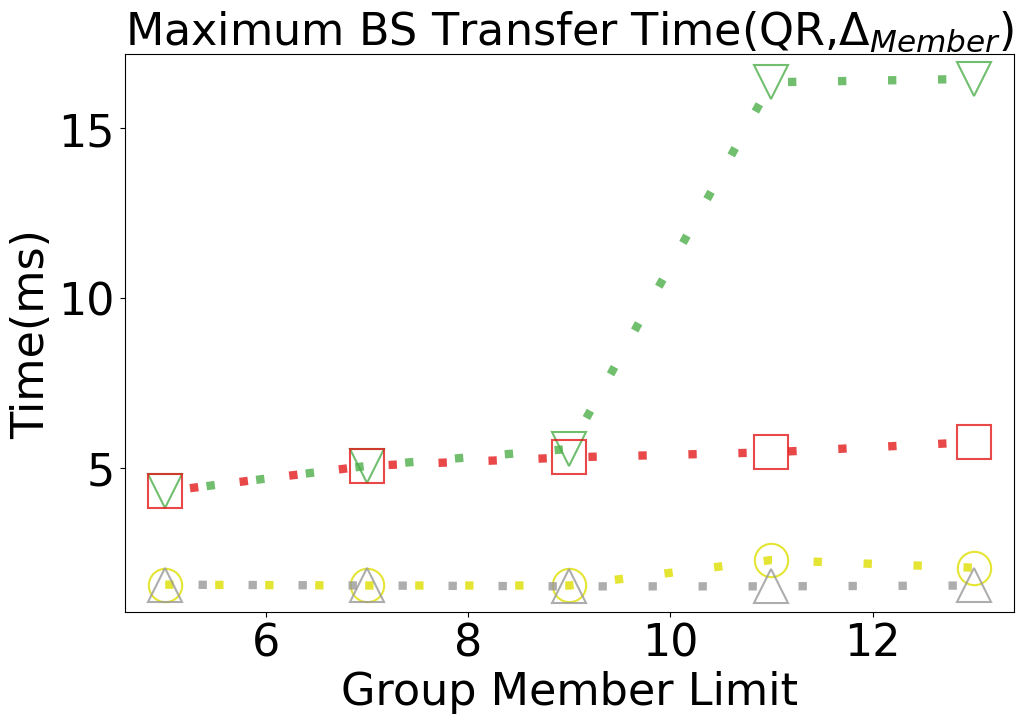

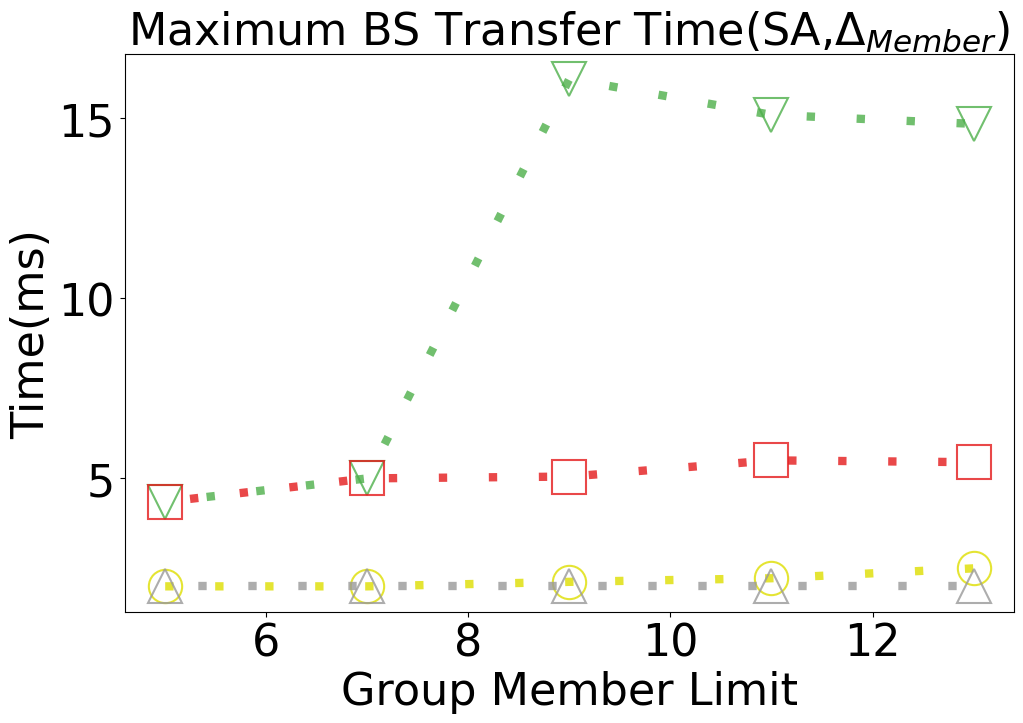

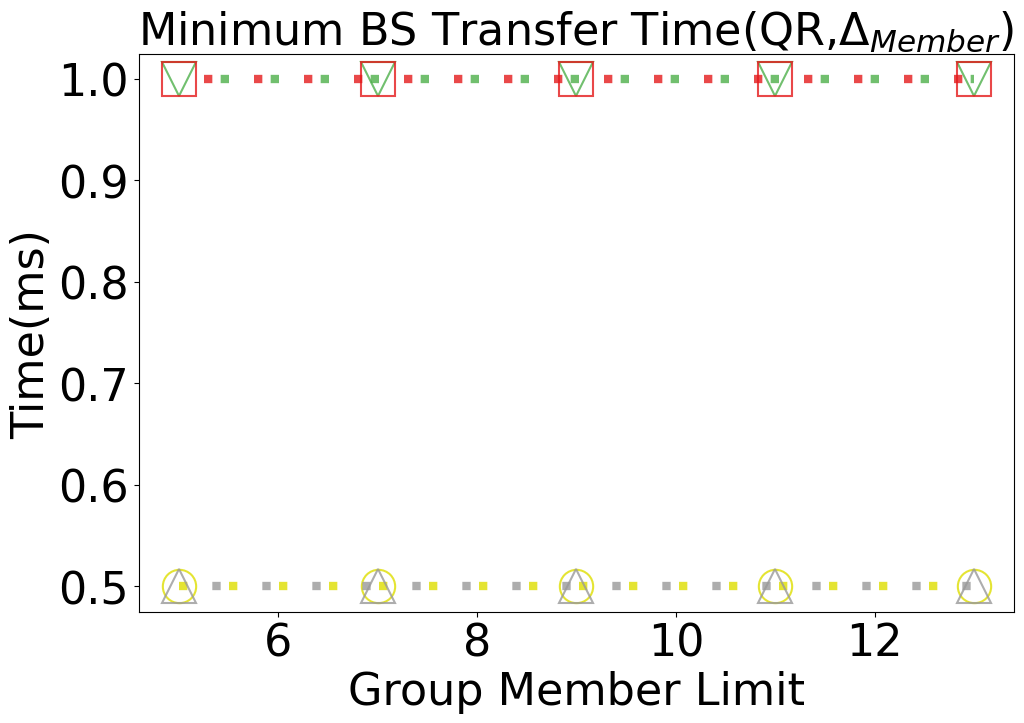

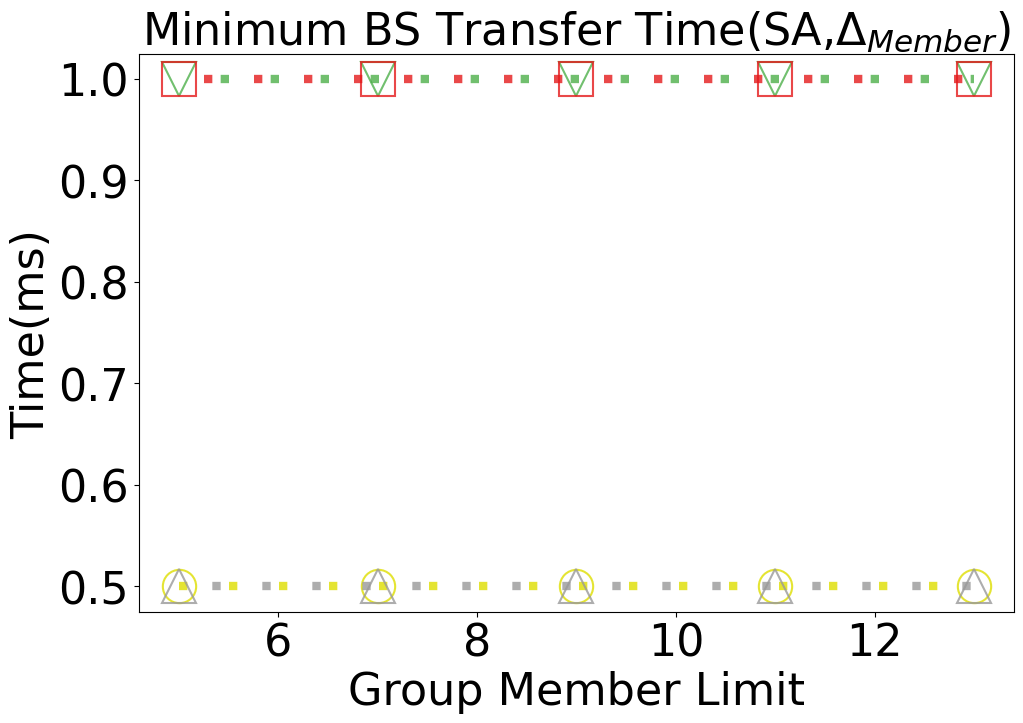

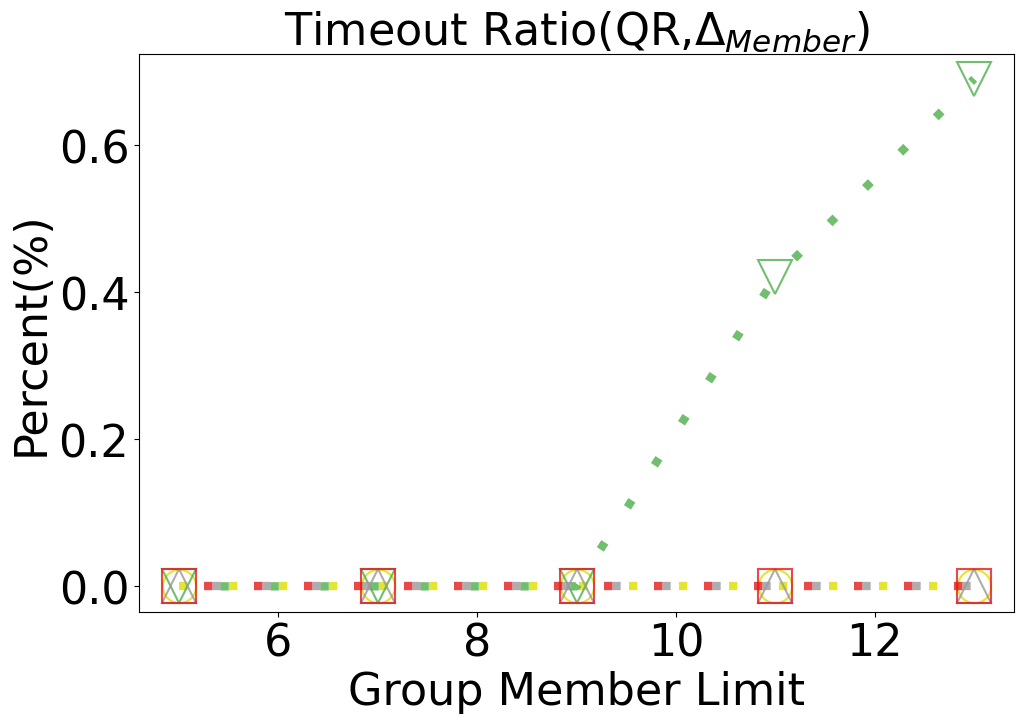

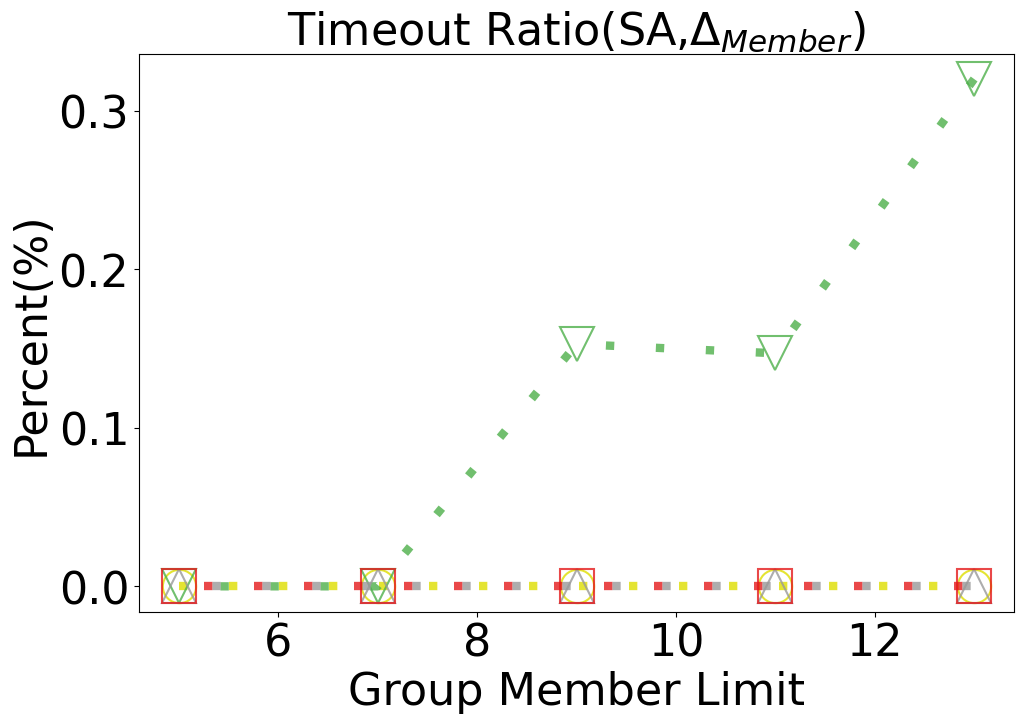

<Figure size 600x400 with 0 Axes>

In [8]:
ShowGraphs(graphs,True,"max_n_member",2)